In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [23]:
data = pd.read_csv(r"C:\Users\PRAJWAL\Desktop\6th SEM\ML\ML-Lab\ML_Lab_datasets\Breast cancer.csv")  
data = data.drop(['id', 'Unnamed: 32'], axis=1)
data['diagnosis'] = data['diagnosis'].map({'M': 1, 'B': 0})
X = data.drop('diagnosis', axis=1)
#y = data['diagnosis']
#data.drop(columns=["diagnosis"], inplace=True)

In [25]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [27]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [29]:
kmeans = KMeans(n_clusters=2, random_state=42, n_init=10)
clusters = kmeans.fit_predict(X_pca)

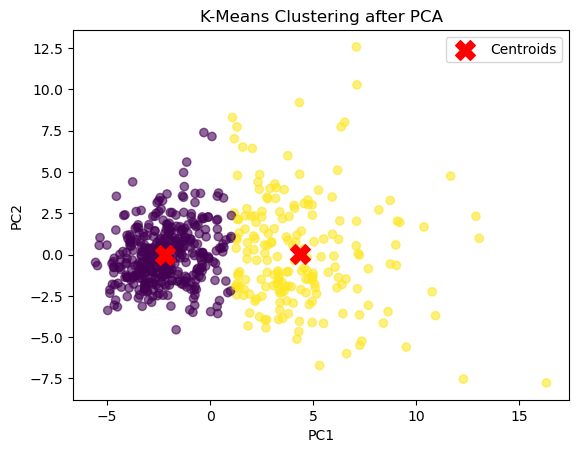

In [31]:
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', alpha=0.6)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            c='red', s=200, marker='X', label='Centroids')
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.title("K-Means Clustering after PCA")
plt.legend()
plt.show()